In [56]:
import json
def load_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data
v1_path = "/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/zero-shot-video-to-text/experiments/summary_study_activityNet/manual_rating/decap_output_val_1_summary_id_caption_hasnat_low72.json"
v1 = load_json_file(v1_path)

len(v1)

v1[0]

['v_4Lu8ECLHvK4',
 {'start': 0,
  'end': 124.23,
  'summary_cap': 'There are some people including small children near a soccer field.',
  'path': '/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/zero-shot-video-to-text/data/ActivityNet_captions_dataset/validation/Playing_kickball/4Lu8ECLHvK4.mp4',
  'generated_summary': 'Video presents the pitch for a pitcher throwing to his son, who is playing in an elementary baseball league.',
  'url': 'https://www.youtube.com/watch?v=4Lu8ECLHvK4',
  'label': 'Playing kickball',
  'tian_caption_no_instruction': '',
  'hasnat_caption_no_instruction': '',
  'tian_caption_with_instruction': '',
  'hasnat_caption_with_instruction': '',
  'caption_rating(1-wst, 5-bst)': '4',
  'slot2_path': '/slot2/open_ended_video_analytics/data/ActivityNet_200/validation/Playing_kickball/4Lu8ECLHvK4.mp4',
  'slot2_framepath': '/slot2/open_ended_video_analytics/data/Decap_ANet_videosummary/4Lu8ECLHvK4',
  'DeCap_caption': 'a baseball player is up to bat a

In [51]:
c =0
for v in v1:
    cap__rate = v[1].get('caption_rating(1-wst, 5-bst)', '')
    if cap__rate  == '5':
        c+=1
c        

36

In [70]:
v2_path = "/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/zero-shot-video-to-text/experiments/summary_study_activityNet/manual_rating/decap_output_val_2_summary_id_caption_tian_low82.json"
v2 =load_json_file(v2_path)
c =0
for v in v2:
    cap__rate = v[1].get('caption_rating(1-wst, 5-bst)', '')
    if cap__rate  == '5':
        c+=1
c

49

In [14]:
# our captions vs _low10 (tian)
low10_tian_path = "/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/zero-shot-video-to-text/experiments/summary_study_activityNet/manual_captioning/decap_output_val_1_summary_id_caption_tian_low10.json"
low_tian = load_json_file(low10_tian_path)

low_tian[0]

['v_4Lu8ECLHvK4',
 {'start': 0,
  'end': 124.23,
  'summary_cap': 'There are some people including small children near a soccer field.',
  'path': '/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/zero-shot-video-to-text/data/ActivityNet_captions_dataset/validation/Playing_kickball/4Lu8ECLHvK4.mp4',
  'generated_summary': 'Video presents the pitch for a pitcher throwing to his son, who is playing in an elementary baseball league.',
  'url': 'https://www.youtube.com/watch?v=4Lu8ECLHvK4',
  'label': 'Playing kickball',
  'tian_caption_no_instruction': 'a group of kids are playing in the field.',
  'hasnat_caption_no_instruction': '',
  'tian_caption_with_instruction': '',
  'hasnat_caption_with_instruction': '',
  'caption_rating(1-wst, 5-bst)': '',
  'slot2_path': '/slot2/open_ended_video_analytics/data/ActivityNet_200/validation/Playing_kickball/4Lu8ECLHvK4.mp4',
  'slot2_framepath': '/slot2/open_ended_video_analytics/data/Decap_ANet_videosummary/4Lu8ECLHvK4',
  'DeCap_cap

In [27]:
import nltk
import string
from nltk.translate.bleu_score import sentence_bleu
import statistics
def remove_punctuation(sentence):
    # Remove punctuations from the sentence
    no_punct = sentence.translate(str.maketrans("", "", string.punctuation))
    # Lowercase all the words
    lowercase_sentence = no_punct.lower()

    # stem words
    stemmer = nltk.stem.PorterStemmer()
    sentence = " ".join([stemmer.stem(word) for word in lowercase_sentence.split()])
    return sentence
reference = []
candidate = []
for v in low_tian:
    # print(remove_punctuation(v[1].get('tian_caption_no_instruction', '')))
    # Extract 'tian_caption_no_instruction' in a list called 'candidate'
    candidate.append(remove_punctuation(v[1].get('tian_caption_no_instruction', '')))

    # Extract 'summary_cap' in a list called 'reference'
    reference.append(remove_punctuation(v[1].get('summary_cap', '')))




# Tokenize the captions
reference_captions = [caption.split() for caption in reference]
candidate_captions = [caption.split() for caption in candidate]

print("len(reference_captions)",len(reference))
print("len(candidate_captions)",len(candidate))
# Calculate BLEU score
cumulative_bleu_scores = []
weight_list = [(1, 0, 0, 0),(0.5, 0.5, 0, 0),(0.33, 0.33, 0.33, 0),(0.25, 0.25, 0.25, 0.25)]
for n in range(1, 5):
    bleu_scores = [sentence_bleu(ref, cand, weights=weight_list[n-1]) for ref, cand in zip(reference_captions, candidate_captions)]
    
    # print(type(bleu_scores))

    average_bleu_score = statistics.mean(bleu_scores)
    cumulative_bleu_scores.append(average_bleu_score)

# Print cumulative BLEU scores
print("cumulative BLEU scores:")
for i, score in enumerate(cumulative_bleu_scores):
    print(f"BLEU@{i+1}: {score:.4f}")

len(reference_captions) 10
len(candidate_captions) 10
cumulative BLEU scores:
BLEU@1: 0.0888
BLEU@2: 0.0000
BLEU@3: 0.0000
BLEU@4: 0.0000


In [35]:
# ground truth cap vs low10 hasnat
low10_hasnat_path = "/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/zero-shot-video-to-text/experiments/summary_study_activityNet/manual_captioning/decap_output_val_1_summary_id_caption_hasnat_low10.json"
low_hasnat = load_json_file(low10_hasnat_path)


import nltk
import string
from nltk.translate.bleu_score import sentence_bleu
import statistics
def remove_punctuation(sentence):
    # Remove punctuations from the sentence
    no_punct = sentence.translate(str.maketrans("", "", string.punctuation))
    # Lowercase all the words
    lowercase_sentence = no_punct.lower()

    # stem words
    stemmer = nltk.stem.PorterStemmer()
    sentence = " ".join([stemmer.stem(word) for word in lowercase_sentence.split()])
    return sentence
reference = []
candidate = []
for v in low_hasnat:
    # print(remove_punctuation(v[1].get('tian_caption_no_instruction', '')))
    # Extract 'tian_caption_no_instruction' in a list called 'candidate'
    candidate.append(remove_punctuation(v[1].get('hasnat_caption_no_instruction', '')))

    # Extract 'summary_cap' in a list called 'reference'
    reference.append(remove_punctuation(v[1].get('summary_cap', '')))




# Tokenize the captions
reference_captions = [caption.split() for caption in reference]
candidate_captions = [caption.split() for caption in candidate]

print("len(reference_captions)",len(reference))
print("len(candidate_captions)",len(candidate))
# Calculate BLEU score
cumulative_bleu_scores = []
weight_list = [(1, 0, 0, 0),(0.5, 0.5, 0, 0),(0.33, 0.33, 0.33, 0),(0.25, 0.25, 0.25, 0.25)]
for n in range(1, 5):
    bleu_scores = [sentence_bleu(ref, cand, weights=weight_list[n-1]) for ref, cand in zip(reference_captions, candidate_captions)]
    
    # print(type(bleu_scores))

    average_bleu_score = statistics.mean(bleu_scores)
    cumulative_bleu_scores.append(average_bleu_score)

# Print cumulative BLEU scores
print("cumulative BLEU scores:")
for i, score in enumerate(cumulative_bleu_scores):
    print(f"BLEU@{i+1}: {score:.4f}")

len(reference_captions) 10
len(candidate_captions) 10
cumulative BLEU scores:
BLEU@1: 0.0975
BLEU@2: 0.0000
BLEU@3: 0.0000
BLEU@4: 0.0000


/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score

In [36]:
# gt hasnat tian

low_hasnat
low_tian
candidate = []
reference = []

for v in low_tian:
    

    # Extract 'summary_cap' in a list called 'reference'
    
    candidate.append(remove_punctuation(v[1].get('tian_caption_no_instruction', '')))
for v in low_hasnat:
    


    reference.append(remove_punctuation(v[1].get('hasnat_caption_no_instruction', '')))
    
# Tokenize the captions
reference_captions = [caption.split() for caption in reference]
candidate_captions = [caption.split() for caption in candidate]

print("len(reference_captions)",len(reference))
print("len(candidate_captions)",len(candidate))
# Calculate BLEU score
cumulative_bleu_scores = []
weight_list = [(1, 0, 0, 0),(0.5, 0.5, 0, 0),(0.33, 0.33, 0.33, 0),(0.25, 0.25, 0.25, 0.25)]
for n in range(1, 5):
    bleu_scores = [sentence_bleu(ref, cand, weights=weight_list[n-1]) for ref, cand in zip(reference_captions, candidate_captions)]
    
    # print(type(bleu_scores))

    average_bleu_score = statistics.mean(bleu_scores)
    cumulative_bleu_scores.append(average_bleu_score)

# Print cumulative BLEU scores
print("cumulative BLEU scores:")
for i, score in enumerate(cumulative_bleu_scores):
    print(f"BLEU@{i+1}: {score:.4f}")

len(reference_captions) 10
len(candidate_captions) 10
cumulative BLEU scores:
BLEU@1: 0.1013
BLEU@2: 0.0000
BLEU@3: 0.0000
BLEU@4: 0.0000


/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score

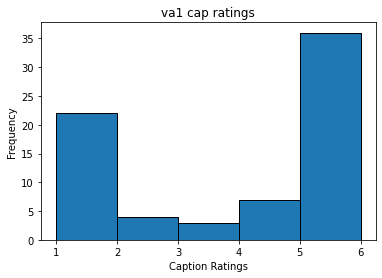

In [64]:
#plot ratings
import matplotlib.pyplot as plt
import numpy as np

caption_ratings = []
for v in v1:
    caption_ratings.append(int(v[1]['caption_rating(1-wst, 5-bst)']))



# print(caption_ratings)

# Convert caption ratings to integers
caption_ratings = list(map(int, caption_ratings))

# Plot the distribution
plt.hist(caption_ratings, bins=np.arange(1,7), edgecolor='black')

# Set labels and title
plt.xlabel('Caption Ratings')
plt.ylabel('Frequency')
plt.title('va1 cap ratings')

# Show the plot
plt.show()

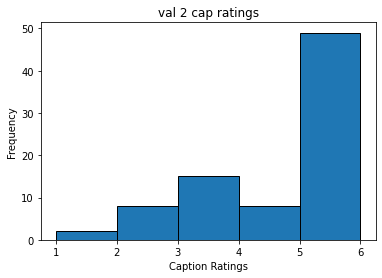

In [71]:
#plot ratings
import matplotlib.pyplot as plt
import numpy as np

caption_ratings = []
for v in v2:
    # print(v[1]['caption_rating(1-wst, 5-bst)'])
    caption_ratings.append(int(v[1]['caption_rating(1-wst, 5-bst)']))



# print(caption_ratings)

# Convert caption ratings to integers
caption_ratings = list(map(int, caption_ratings))

# Plot the distribution
plt.hist(caption_ratings, bins=np.arange(1,7), edgecolor='black')

# Set labels and title
plt.xlabel('Caption Ratings')
plt.ylabel('Frequency')
plt.title('val 2 cap ratings')

# Show the plot
plt.show()

In [72]:
# ground truth cap vs low10 hasnat
low10_hasnat_path = "/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/zero-shot-video-to-text/experiments/summary_study_activityNet/manual_captioning/decap_output_val_1_summary_id_caption_hasnat_low10.json"
low_hasnat = load_json_file(low10_hasnat_path)


import nltk
import string
from nltk.translate.bleu_score import sentence_bleu
import statistics
def remove_punctuation(sentence):
    # Remove punctuations from the sentence
    no_punct = sentence.translate(str.maketrans("", "", string.punctuation))
    # Lowercase all the words
    lowercase_sentence = no_punct.lower()

    # stem words
    stemmer = nltk.stem.PorterStemmer()
    sentence = " ".join([stemmer.stem(word) for word in lowercase_sentence.split()])
    return sentence
reference = ["A woman stands in a room"]
candidate = ["a women is playing violin"]





# Tokenize the captions
reference_captions = [caption.split() for caption in reference]
candidate_captions = [caption.split() for caption in candidate]

print("len(reference_captions)",len(reference))
print("len(candidate_captions)",len(candidate))
# Calculate BLEU score
cumulative_bleu_scores = []
weight_list = [(1, 0, 0, 0),(0.5, 0.5, 0, 0),(0.33, 0.33, 0.33, 0),(0.25, 0.25, 0.25, 0.25)]
for n in range(1, 5):
    bleu_scores = [sentence_bleu(ref, cand, weights=weight_list[n-1]) for ref, cand in zip(reference_captions, candidate_captions)]
    
    # print(type(bleu_scores))

    average_bleu_score = statistics.mean(bleu_scores)
    cumulative_bleu_scores.append(average_bleu_score)

# Print cumulative BLEU scores
print("cumulative BLEU scores:")
for i, score in enumerate(cumulative_bleu_scores):
    print(f"BLEU@{i+1}: {score:.4f}")

len(reference_captions) 1
len(candidate_captions) 1
cumulative BLEU scores:
BLEU@1: 0.2000
BLEU@2: 0.0000
BLEU@3: 0.0000
BLEU@4: 0.0000


/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/grads/h/hasnat.md.abdullah/open_ended_activity_analysis/oeaa/lib/python3.6/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score